In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [21]:
cases=pd.read_csv('covid_worldwide.csv')

In [22]:
cases.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [33]:
cases.shape

(231, 7)

In [35]:
cases.describe()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,231,231,225,210,212,213,228
unique,231,231,213,210,181,212,228
top,USA,"104,196,861",38,"101,322,779",0,"78,646","334,805,269"
freq,1,1,3,1,8,2,1


In [29]:
cases=cases.drop('Serial Number',axis=1)

In [30]:
cases.isnull()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
226,False,False,False,False,False,True,True
227,False,False,True,False,False,True,False
228,False,False,False,False,False,True,False
229,False,False,False,False,False,True,True


<AxesSubplot:>

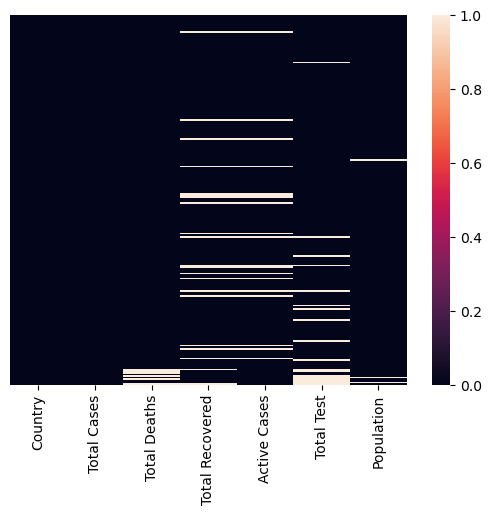

In [31]:
sns.heatmap(cases.isnull(),yticklabels=False)

In [61]:
new=cases.dropna()

In [65]:
new.iloc[:,1:]=new.iloc[:,1:].apply(lambda x: x.astype(str).str.replace(',','').astype(int))
new.head()

C:\Users\sriram kumar\AppData\Local\Temp\ipykernel_2032\2586924729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.iloc[:,1:]=new.iloc[:,1:].apply(lambda x: x.astype(str).str.replace(',','').astype(int))


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,USA,104196861,1132935,101322779,1741147,1159832679,334805269
1,India,44682784,530740,44150289,1755,915265788,1406631776
2,France,39524311,164233,39264546,95532,271490188,65584518
3,Germany,37779833,165711,37398100,216022,122332384,83883596
4,Brazil,36824580,697074,35919372,208134,63776166,215353593


In [86]:
new_cases=new[new['Total Cases']>3000000]
new_cases

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,USA,104196861,1132935,101322779,1741147,1159832679,334805269
1,India,44682784,530740,44150289,1755,915265788,1406631776
2,France,39524311,164233,39264546,95532,271490188,65584518
3,Germany,37779833,165711,37398100,216022,122332384,83883596
4,Brazil,36824580,697074,35919372,208134,63776166,215353593
5,Japan,32588442,68399,21567425,10952618,92144639,125584838
6,S. Korea,30197066,33486,29740877,422703,15804065,51329899
7,Italy,25453789,186833,25014986,251970,265478247,60262770
8,UK,24274361,204171,24020088,50102,522526476,68497907
9,Russia,21958696,395108,21356008,207580,273400000,145805947


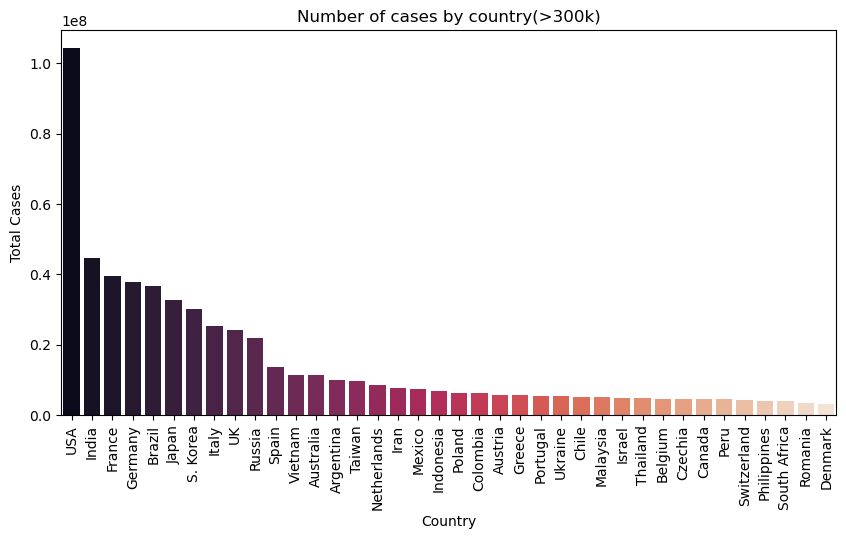

In [102]:
new_cases_sorted=new_deaths.sort_values(by='Total Cases',ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=new_cases_sorted,x='Country',y='Total Cases',palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Number of cases by country(>300k)')
plt.show()



In [94]:
new_deaths_sorted=new[new['Total Deaths']>40000].sort_values(by='Total Cases',ascending=False)

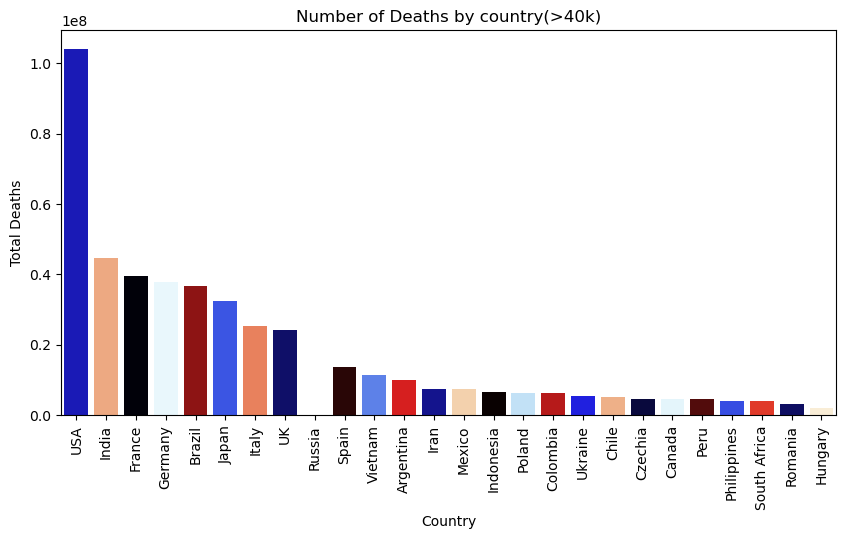

In [105]:
plt.figure(figsize=(10,5))
sns.barplot(data=new_deaths_sorted,x='Country',y='Total Cases',palette='flag')

plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Number of Deaths by country(>40k)')
plt.show()

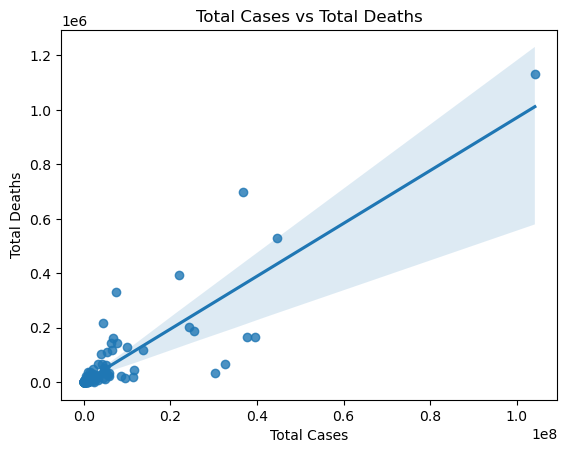

In [106]:
reg_data=new[['Total Cases','Total Deaths']].astype(float)

sns.regplot(data=reg_data, x='Total Cases',y='Total Deaths')


plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.title('Total Cases vs Total Deaths')
plt.show()




In [111]:
new_recovered_sorted=new[new['Total Recovered']>4000000000].sort_values(by='Total Recovered',ascending=False)

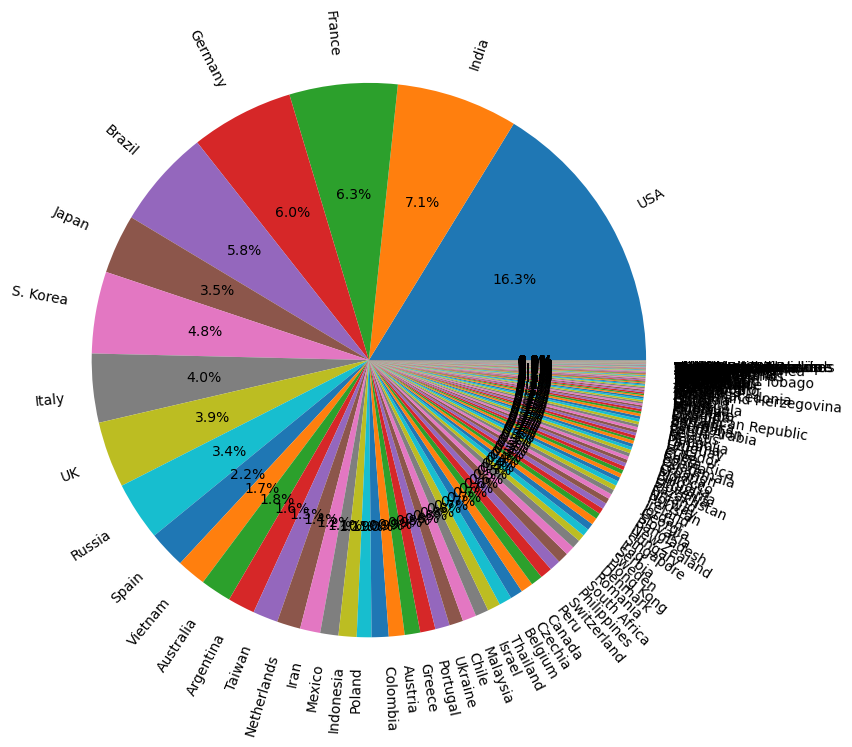

In [115]:
plt.subplots(figsize=(10,9))
plt.pie(data=new,x="Total Recovered",labels=new["Country"],autopct="%0.1f%%",rotatelabels=True)
plt.show()